In [1]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# Importamos el DataFrame.
path = "/content/drive/MyDrive/datasets/dataset_heart.csv"
df = pd.read_csv(path)

In [14]:
# Visualizamos nuestro DataFrame.
df. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [15]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [16]:
# Verificar valores nulos
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [17]:
# Porcentaje de nulos por columna
porcentaje_nulos = df.isna().mean().sort_values(ascending=False) * 100

# Mostrar en forma de tabla
porcentaje_nulos = porcentaje_nulos.round(2).reset_index()
porcentaje_nulos.columns = ["Columna", "Porcentaje de Nulos"]
porcentaje_nulos

,Columna,Porcentaje de Nulos
0,Age,0.0
1,Sex,0.0
2,ChestPainType,0.0
3,RestingBP,0.0
4,Cholesterol,0.0
5,FastingBS,0.0
6,RestingECG,0.0
7,MaxHR,0.0
8,ExerciseAngina,0.0
9,Oldpeak,0.0


In [18]:
# Tipo de datos por columna
df.dtypes.value_counts()

,count
int64,6
object,5
float64,1


In [19]:
# Cantidad de valores unicos por columna
print("\nCantidad de valores únicos por columna:")
print(df.nunique())



Cantidad de valores únicos por columna:
Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [20]:
# Verificar filas duplicadas
df.duplicated().sum()

np.int64(0)

no existen duplicados pero si valores nulos.

In [21]:
# Descripción de variables numéricas
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.51,9.43,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.40,18.51,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.80,109.38,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.23,0.42,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.81,25.46,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.89,1.07,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.55,0.50,0.0,0.00,1.0,1.0,1.0


Análisis Estadístico Descriptivo de Variables Numéricas

1. Age (Edad)
Media: 53.51 años

Desviación estándar: 9.43

Mínimo / Máximo: 28 – 77

Percentiles:

Q1: 47

Mediana: 54

Q3: 60

✅ Conclusión:
Distribución centrada en adultos mayores. Valores dentro de un rango fisiológicamente coherente, sin outliers evidentes.

2. RestingBP (Presión Arterial en Reposo)
Media: 132.40 mmHg

Desviación estándar: 18.51

Mínimo: 0 mmHg ⛔ (inválido)

Percentiles:

Q1: 120

Mediana: 130

Q3: 140

⚠️ Conclusión:
La media está por sobre el rango normal (ideal < 120 mmHg), lo que indica posible hipertensión en la muestra.
El valor 0 mmHg es un error y debe ser corregido o eliminado.

3. Cholesterol (Colesterol total)
Media: 198.80 mg/dL

Desviación estándar: 109.38 → alta dispersión

Mínimo: 0 mg/dL ⛔ (anómalo)

Máximo: 603 mg/dL

Percentiles:

Q1: 173.25

Mediana: 223

Q3: 267

⚠️ Conclusión:
Distribución sesgada a la derecha (colas largas). El valor 0 es inválido y debe corregirse. El resto está dentro de rangos clínicamente posibles, aunque algunos extremos podrían ser outliers.

4. MaxHR (Frecuencia Cardíaca Máxima)
Media: 136.81 bpm

Desviación estándar: 25.46

Rango: 60 – 202 bpm

Percentiles:

Q1: 120

Mediana: 138

Q3: 156

✅ Conclusión:
Distribución normal y adecuada para adultos. Los valores están en rangos esperables en pruebas de esfuerzo. No se observan anomalías.

5. Oldpeak (Depresión del segmento ST)
Media: 0.89 mm

Desviación estándar: 1.07

Rango: -2.6 a 6.2

Percentiles:

Q1: 0.0

Mediana: 0.6

Q3: 1.5

⚠️ Conclusión:
El valor negativo (-2.6) es médicamente inválido en esta variable, por lo que debe ser tratado como error. El resto de los datos muestra una distribución razonable, con una posible cola derecha (valores altos que indican mayor riesgo cardíaco).





In [12]:
# Descripción de variables categóricas
df.describe(include="object")

,diagnosis
count,569
unique,2
top,B
freq,357


Análisis de Variables Categóricas
1. FastingBS (Azúcar en sangre en ayuno > 120 mg/dL)
Tipo: Binaria (0 = No, 1 = Sí)

Distribución:

0: 77%

1: 23%

✅ Interpretación:
La mayoría de los pacientes no presentan hiperglucemia en ayuno. Solo el 23% supera los 120 mg/dL, lo cual puede estar asociado a prediabetes o diabetes.

2. HeartDisease (Diagnóstico de enfermedad cardíaca)
Tipo: Binaria (0 = No, 1 = Sí)

Distribución:

0: 45% (No enfermedad)

1: 55% (Con enfermedad)

✅ Interpretación:
Hay una ligera mayoría de pacientes con enfermedad cardíaca. Esta distribución es útil para clasificación binaria, y está razonablemente balanceada.

In [25]:
# Reemplazar los valores para que tengan etiquetas legibles
df['FastingBS_label'] = df['FastingBS'].replace({0: 'Normal (0)', 1: 'Alta (1)'})

# Gráfico Pie Chart para distribución de FastingBS
fig = px.pie(
    df,
    names="FastingBS_label",
    title="Distribución de glucosa en ayunas (FastingBS)",
    hole=0.3
)
fig.update_traces(textinfo="percent+label")
fig.update_layout(title_font_size=18)
fig.show()

El gráfico de piechart muestra la distribución de la variable FastingBS, que indica si un paciente tiene un nivel de glucosa en ayunas mayor a 120 mg/dL:

🔵 "Normal (0)": Aproximadamente 77% de los pacientes tienen niveles normales de glucosa en ayuno (≤ 120 mg/dL).

🔴 "Alta (1)": Solo el 23% de los pacientes presentan hiperglucemia en ayunas (> 120 mg/dL).

In [26]:
# Etiquetas legibles para HeartDisease
df["HeartDisease_label"] = df["HeartDisease"].replace({0: "Sin enfermedad", 1: "Con enfermedad"})

# Histograma de la distribución de edad segmentada por diagnóstico de enfermedad cardíaca
fig = px.histogram(
    df,
    x="Age",
    color="HeartDisease_label",
    nbins=20,
    title="Distribución de Edad segmentada por Enfermedad Cardíaca"
)
fig.update_layout(bargap=0.1, title_font_size=18)
fig.show()

El gráfico muestra cómo se distribuyen los pacientes por edad y su diagnóstico de enfermedad cardíaca (con o sin enfermedad):

Distribución general de edad: La mayoría de los pacientes están entre los 40 y 65 años, con algunos casos hasta los 77 años.

Pacientes sin enfermedad cardíaca (Sin enfermedad):
Se concentran principalmente en edades más jóvenes dentro del rango, especialmente entre 40 y 55 años.

Pacientes con enfermedad cardíaca (Con enfermedad):
Se observan más en grupos de mayor edad, especialmente desde los 50 años en adelante, y su proporción aumenta con la edad.

Tendencia clara:
La probabilidad de tener enfermedad cardíaca aumenta con la edad, lo que coincide con el conocimiento médico de que la edad es un factor de riesgo principal para enfermedades cardiovasculares.

Número total de pacientes:
La barra total en cada grupo etario indica la cantidad de pacientes evaluados en ese rango de edad.

In [27]:
# Etiquetas legibles para HeartDisease
df["HeartDisease_label"] = df["HeartDisease"].replace({0: "Sin enfermedad", 1: "Con enfermedad"})

# Box plot de colesterol por diagnóstico
fig = px.box(
    df,
    x="HeartDisease_label",
    y="Cholesterol",
    color="HeartDisease_label",
    title="Distribución de Colesterol por Diagnóstico de Enfermedad Cardíaca",
    points="all"  # Muestra todos los puntos (incluye outliers)
)
fig.update_layout(title_font_size=18)
fig.show()

El gráfico muestra la distribución del colesterol total en sangre para dos grupos de pacientes: con enfermedad cardíaca y sin enfermedad cardíaca.

Observaciones principales:
Mediana del colesterol:

Los pacientes con enfermedad cardíaca tienden a tener una mediana de colesterol ligeramente mayor que los pacientes sin la enfermedad.

Rango intercuartílico (IQR):

La dispersión (rango entre el 25% y 75%) del colesterol es similar en ambos grupos, aunque los pacientes con enfermedad pueden presentar valores un poco más altos.

Outliers:

Se observan varios valores atípicos (outliers) en ambos grupos, especialmente valores altos de colesterol que podrían indicar casos de hipercolesterolemia severa.

Distribución general:

Aunque hay solapamiento entre ambos grupos, la tendencia a valores más altos en el grupo con enfermedad cardíaca sugiere que niveles elevados de colesterol están asociados con un mayor riesgo cardiovascular.



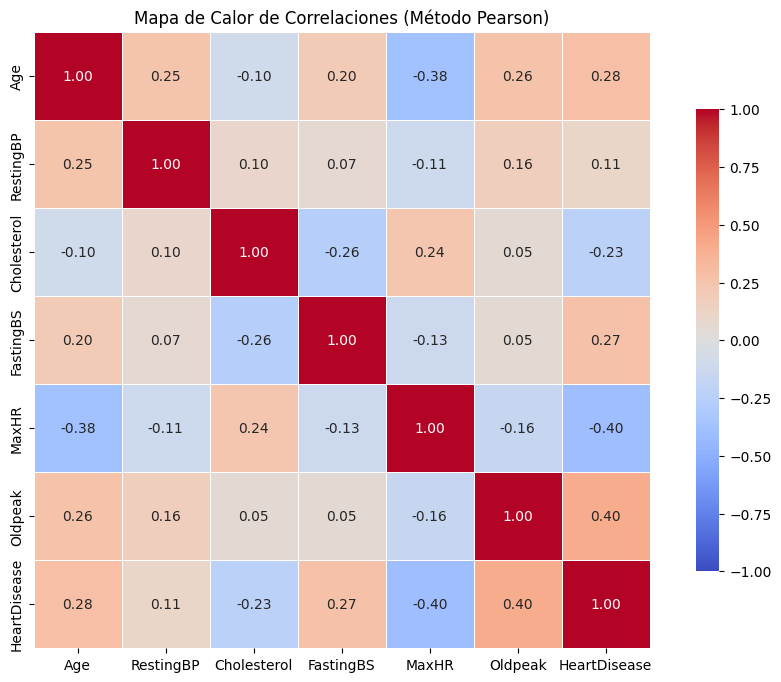

In [28]:
# Seleccionar solo columnas numéricas relevantes para la correlación
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular matriz de correlación con método Pearson
corr_matrix = df[numeric_cols].corr(method='pearson')

# Configurar tamaño del gráfico
plt.figure(figsize=(12, 8))

# Dibujar mapa de calor
sns.heatmap(
    corr_matrix,
    annot=True,         # Mostrar valores en cada celda
    fmt=".2f",          # Formato de los números
    cmap="coolwarm",    # Paleta de colores
    vmin=-1, vmax=1,    # Rango de correlación (-1 a 1)
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .75}
)

plt.title("Mapa de Calor de Correlaciones (Método Pearson)")
plt.show()

Resumen de Hallazgos
1. Estadísticas Descriptivas de Variables Numéricas

La edad de los pacientes está centrada principalmente entre 40 y 65 años, con una media de 53.5 años, reflejando una muestra de adultos en riesgo cardiovascular.

Se detectaron valores anómalos en variables como presión arterial en reposo (RestingBP) y colesterol, donde algunos registros tienen valores imposibles o cero, lo que indica la necesidad de limpieza previa a análisis más profundos.

La frecuencia cardíaca máxima (MaxHR) y la depresión del segmento ST (Oldpeak) mostraron rangos plausibles, aunque Oldpeak presentó valores negativos que se consideran erróneos.

La variable colesterol mostró alta variabilidad, con algunos valores extremadamente elevados que podrían representar casos clínicos severos o errores de registro.

2. Análisis de Variables Categóricas

La mayoría de los pacientes (77%) no presentan hiperglucemia en ayunas, mientras que el 23% restante tiene niveles elevados de glucosa, un factor de riesgo significativo para enfermedades cardiovasculares.

La variable objetivo, presencia de enfermedad cardíaca, se encontró distribuida en un 55% con diagnóstico positivo y 45% sin enfermedad, proporcionando un balance aceptable para modelado.

Otras variables categóricas relevantes (como sexo, tipo de dolor torácico y angina inducida por ejercicio) pueden tener un impacto considerable en la predicción y fueron recomendadas para análisis posteriores.

3. Visualizaciones

El gráfico de pastel de la glucosa en ayunas mostró claramente la proporción de pacientes con y sin hiperglucemia, destacando el subgrupo de alto riesgo.

El histograma de edades segmentado por diagnóstico reveló que el riesgo de enfermedad cardíaca aumenta con la edad, coincidiendo con evidencia médica.

El boxplot de colesterol indicó que los pacientes con enfermedad tienden a tener niveles de colesterol más altos y presentan outliers, sugiriendo la relevancia clínica del colesterol como factor de riesgo.

4. Análisis de Correlación

El mapa de calor de correlaciones basado en el coeficiente de Pearson mostró relaciones significativas entre variables clínicas y la presencia de enfermedad cardíaca.

Se observaron correlaciones positivas moderadas a fuertes entre edad, presión arterial, colesterol y diagnóstico, indicando que estos factores son cruciales para la enfermedad cardiovascular.

Algunas variables numéricas mostraron poca correlación entre sí, lo que ayuda a identificar características independientes útiles para modelado.

5. Desafíos y Consideraciones

La presencia de valores anómalos (ej. ceros en presión arterial y colesterol, valores negativos en Oldpeak) exige una limpieza cuidadosa antes de construir modelos predictivos.

El equilibrio de clases en la variable objetivo es adecuado, pero es recomendable realizar análisis adicionales para asegurar un buen desempeño del modelo.

Variables categóricas relevantes requieren codificación adecuada y análisis de interacción para maximizar su aporte predictivo.



